The dataset and its business implications

The ﬁle contribution.csv summarizes the contributions received by a selective private liberal arts college in the Midwest. The college has a large endowment and, as all private colleges do, keeps detailed records on alumni donations.

From a business perspective, we want to know the following information :

※ Who are the people who gave us the largest amount of money? Is there any special characteristics regarding them? (Finance & Marketing)

※ Who are the people who did not give us any money at all ? Is there any special characteristics regarding them? (Finance & Marketing)

※ What did most of the people who graduated do after their major? (Alumni perspective)

First we import the data into our R Studio :

In [1]:
#dataimport
MyData <- read.csv("homework.csv", header=TRUE, sep=",")
str(MyData)

'data.frame':	1230 obs. of  11 variables:
 $ Gender         : Factor w/ 2 levels "F","M": 2 2 1 2 2 1 1 1 2 2 ...
 $ Class.Year     : int  1957 1957 1957 1957 1957 1957 1957 1957 1957 1957 ...
 $ Marital.Status : Factor w/ 4 levels "D","M","S","W": 2 2 2 2 2 2 3 2 2 2 ...
 $ Major          : Factor w/ 46 levels "American Studies",..: 26 34 30 26 4 28 26 30 42 16 ...
 $ Next.Degree    : Factor w/ 50 levels "AA","BA","BAE",..: 17 37 42 42 26 42 19 42 42 42 ...
 $ FY04Giving     : num  2500 5000 5000 0 1000 0 0 100 100 0 ...
 $ FY03Giving     : num  2500 5000 5000 5100 1000 0 0 100 100 0 ...
 $ FY02Giving     : num  1400 5000 5000 200 1000 0 0 100 100 0 ...
 $ FY01Giving     : num  12060 5000 5000 200 1005 ...
 $ FY00Giving     : num  12000 10000 10000 0 1000 0 0 100 100 0 ...
 $ AttendenceEvent: int  1 1 1 1 1 0 0 0 0 1 ...


We then try to identify global characteristics regarding the dataset we are working with, to do so we also need to know the different variables :

In [2]:
names(MyData)

[1] "Gender"          "Class.Year"      "Marital.Status"  "Major"          
 [5] "Next.Degree"     "FY04Giving"      "FY03Giving"      "FY02Giving"     
 [9] "FY01Giving"      "FY00Giving"      "AttendenceEvent"

To make our work easier we define variables which might come up handy later on our code.

In [3]:
#Define variables
gender <- MyData$Gender
year <- MyData$Class.Year
status <- MyData$Marital.Status
event <- MyData$AttendenceEvent

We want to know the years people graduated in our dataset. Even though we know it thanks to assignement instructions, data is not always cleaned as much as we would and it is therefore better to check :

In [4]:
#Number of different years
unique(year)

[1] 1957 1967 1977 1987 1997

So we have 5 years in total. We want to know which year gave us the most money. Consequently, we define variables which compute the total amount of donation for each year :

In [5]:
#Business interpretation for donations
firstclass <- MyData[ which(year=="1957"),]
secondclass <- MyData[ which(year=="1967"),]
thirdclass <- MyData [ which(year=="1977"),]
fourthclass <- MyData [ which(year=="1987"),]
fifthclass <- MyData[ which(year=="1997"),]
fcmoney <- sum(firstclass$FY00Giving, firstclass$FY01Giving, firstclass$FY02Giving, firstclass$FY03Giving, firstclass$FY04Giving)
scmoney <- sum(secondclass$FY00Giving, secondclass$FY01Giving, secondclass$FY02Giving, secondclass$FY03Giving, secondclass$FY04Giving)
tcmoney <- sum(thirdclass$FY00Giving, thirdclass$FY01Giving, thirdclass$FY02Giving, thirdclass$FY03Giving, thirdclass$FY04Giving)
fthcmoney <- sum(fourthclass$FY00Giving, fourthclass$FY01Giving, fourthclass$FY02Giving, fourthclass$FY03Giving, fourthclass$FY04Giving)
ffhcmoney <- sum(fifthclass$FY00Giving, fifthclass$FY01Giving, fifthclass$FY02Giving, fifthclass$FY03Giving, fifthclass$FY04Giving)

In [6]:
#Graphic for Donation
loropiana <- c(fcmoney, scmoney, tcmoney, fthcmoney, ffhcmoney)

To ease our graphic interpretation, we need to know the numbers we are working with. Thanks to "print" we can adjust the scale of our graph :

In [7]:
print(loropiana)

[1] 560506.76 293750.74 210768.81 105288.37  35138.92


We now know that we are working with k-scale, which means we can divide by 1000 to get a scalable k axis :

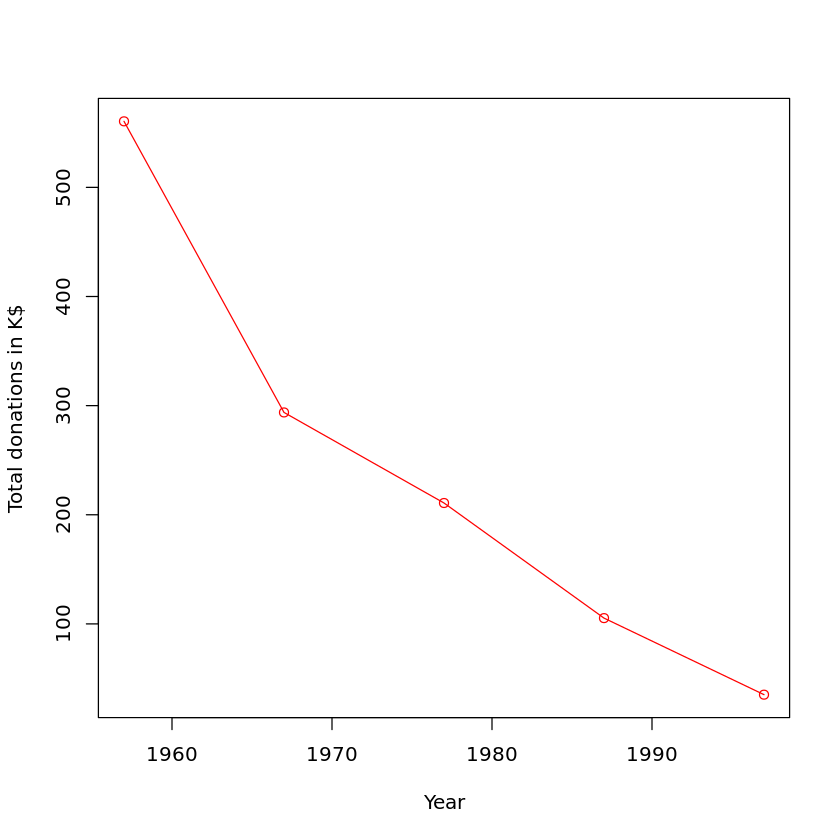

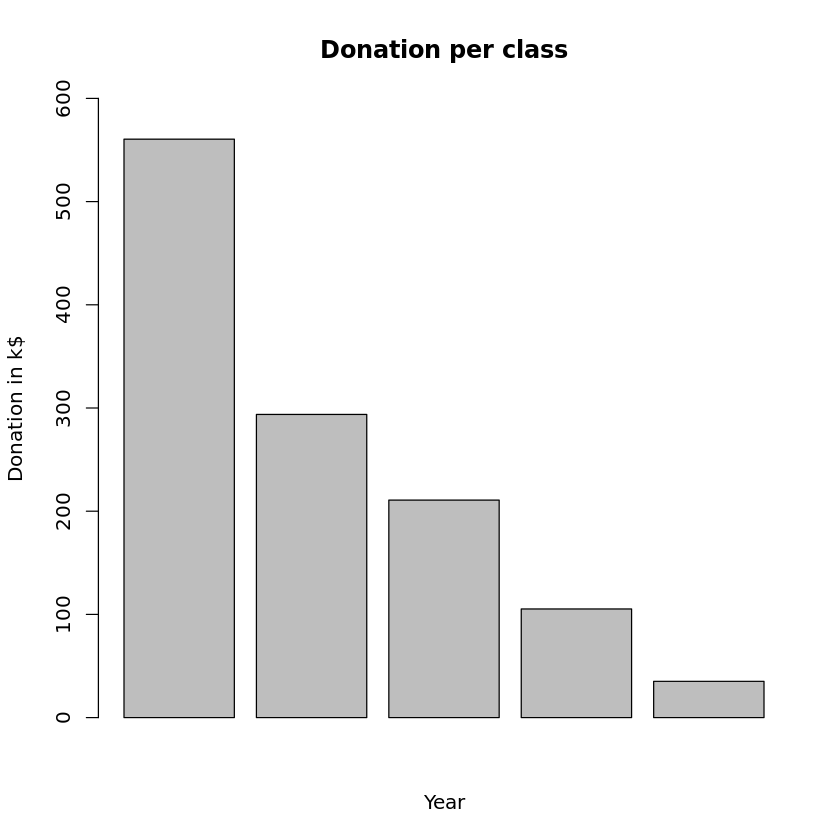

In [8]:
plot(y = loropiana/1000, x=c('1957', '1967', '1977', '1987', '1997'),  col = "red", xlab= "Year", ylab = 'Total donations in K$',type = "o")
barplot(loropiana/1000, main="Donation per class", xlab="Year",ylab="Donation in k$", ylim=c(0,600))

We can see in the above graph that the oldest classes gave us a largest amount of money compared to the more recent one. It makes sense since they would work for longer and have more opportunities to donate money. We want to know if the date is the only factor influencing donation, to figure it out we need the amount of donation per year :

In [9]:
#Money compounded with time

timelapsefc <- 2004 - 1957
timelapsesc <- 2004 - 1967
timelapsetc <- 2004 - 1977
timelapsefthc <- 2004 - 1987
timelapseffhc <- 2004 - 1997
金年１ <- fcmoney/timelapsefc
金年２ <- scmoney/timelapsesc
金年３ <- tcmoney/timelapsetc
金年４ <- fthcmoney/timelapsefthc
金年５ <- ffhcmoney/timelapseffhc
全金年 <- c(金年１, 金年２,金年３,金年４,金年５)
print(全金年)

[1] 11925.676  7939.209  7806.252  6193.434  5019.846


Same as before, we have the same kind of scale, so we also divide by 1000 :

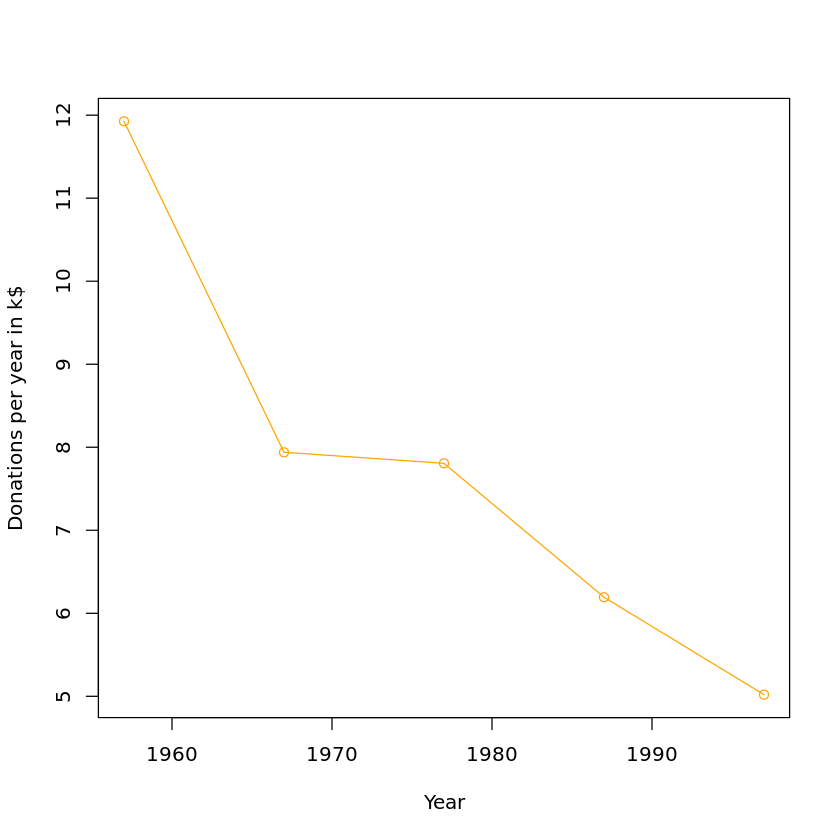

In [10]:
plot(y = 全金年/1000, x=c('1957', '1967', '1977', '1987', '1997'),  col = "orange", xlab= "Year", ylab = 'Donations per year in k$',type = "o")

Here we can see that the oldest one is still the most important one when it comes to donation. However, we also see that the 1977 guys gave overall as much money as the 1967 one within their time.

From a business perspective the most profitable year were : 1957 > 1977 > 1967 > 1987 > 1997

One could argue that 1967 still gave more money than 1977. However they will die earlier so from a marketing perspective they are less attractive.

Now we want to know for each year, which major was the most popular so we may find some pattern in the data between most profitable years and the major :

In [11]:
#Group Analysis - Major

table(firstclass$Major)


         American Studies              Anthropology                       Art 
                        0                         0                         3 
                  Biology                 Chemistry         Chemistry-Zoology 
                        5                         1                         3 
                  Chinese                  Classics    Comparative Literature 
                        0                         0                         2 
         Computer Science                 Economics        Economics-Business 
                        0                         0                        24 
 Economics-Regional Stds.                 Education               Engineering 
                        0                         6                         0 
                  English        English-Journalism                    French 
                       10                         1                         1 
          General Science   General Science-Biology

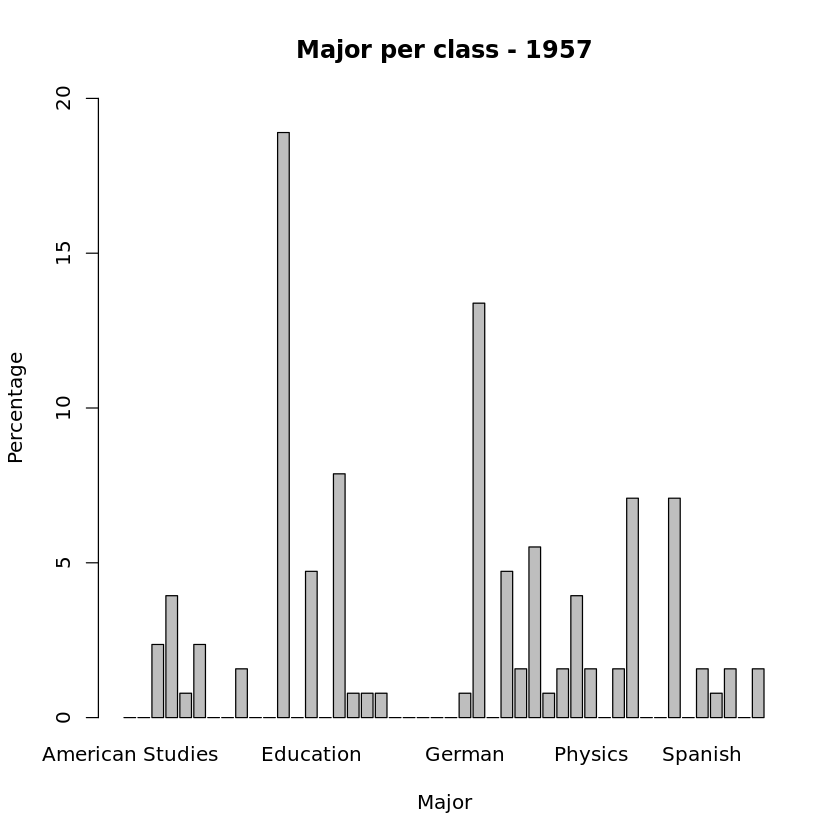

In [12]:
proportionsfirstclass <- table(firstclass$Major)/length(firstclass$Major)
percentagesfirstclass <- proportionsfirstclass*100
barplot(percentagesfirstclass, main="Major per class - 1957", xlab="Major",ylab="Percentage", ylim=c(0,20))

In [13]:
table(secondclass$Major)


         American Studies              Anthropology                       Art 
                        8                         0                         4 
                  Biology                 Chemistry         Chemistry-Zoology 
                       21                        14                         0 
                  Chinese                  Classics    Comparative Literature 
                        0                         3                         0 
         Computer Science                 Economics        Economics-Business 
                        0                        19                         0 
 Economics-Regional Stds.                 Education               Engineering 
                        2                         0                         0 
                  English        English-Journalism                    French 
                       30                         0                         4 
          General Science   General Science-Biology

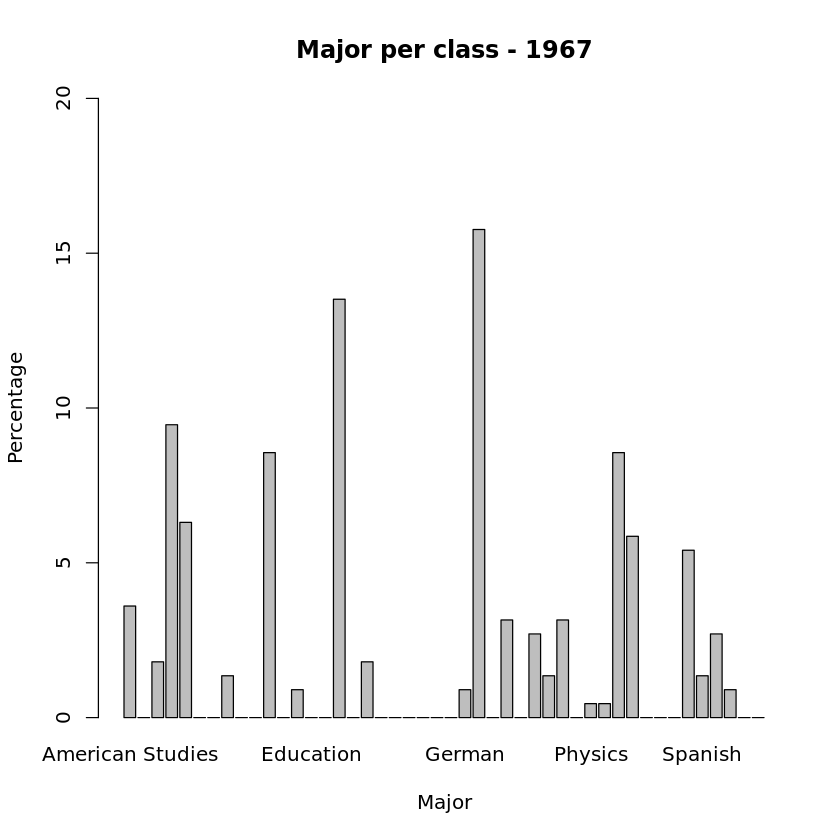

In [14]:
proportionssecondclass <- table(secondclass$Major)/length(secondclass$Major)
percentagessecondclass <- proportionssecondclass*100
barplot(percentagessecondclass, main="Major per class - 1967", xlab="Major",ylab="Percentage", ylim=c(0,20))

In [15]:
table(thirdclass$Major)


         American Studies              Anthropology                       Art 
                        7                        11                        10 
                  Biology                 Chemistry         Chemistry-Zoology 
                       29                         8                         0 
                  Chinese                  Classics    Comparative Literature 
                        0                         2                         0 
         Computer Science                 Economics        Economics-Business 
                        0                        20                         0 
 Economics-Regional Stds.                 Education               Engineering 
                        0                         0                         0 
                  English        English-Journalism                    French 
                       27                         0                         2 
          General Science   General Science-Biology

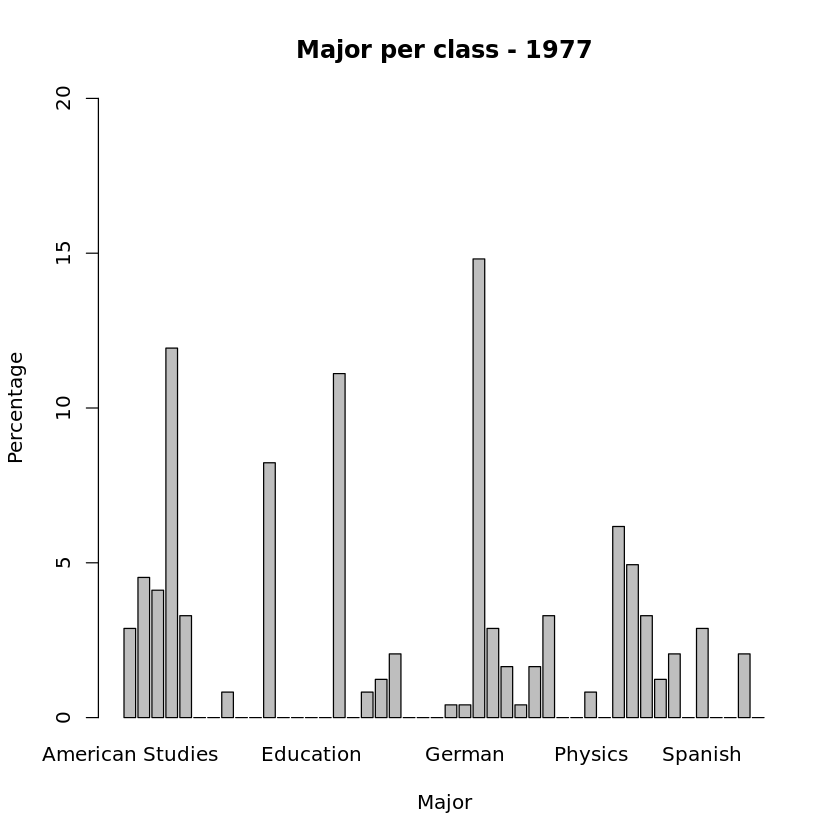

In [16]:
proportionsthirdclass <- table(thirdclass$Major)/length(thirdclass$Major)
percentagesthirdclass <- proportionsthirdclass*100
barplot(percentagesthirdclass, main="Major per class - 1977", xlab="Major",ylab="Percentage", ylim=c(0,20))

In [17]:
table(fourthclass$Major)


         American Studies              Anthropology                       Art 
                        5                        16                        10 
                  Biology                 Chemistry         Chemistry-Zoology 
                       25                        19                         0 
                  Chinese                  Classics    Comparative Literature 
                        0                         0                         0 
         Computer Science                 Economics        Economics-Business 
                        0                        19                         0 
 Economics-Regional Stds.                 Education               Engineering 
                        0                         0                         1 
                  English        English-Journalism                    French 
                       27                         0                         9 
          General Science   General Science-Biology

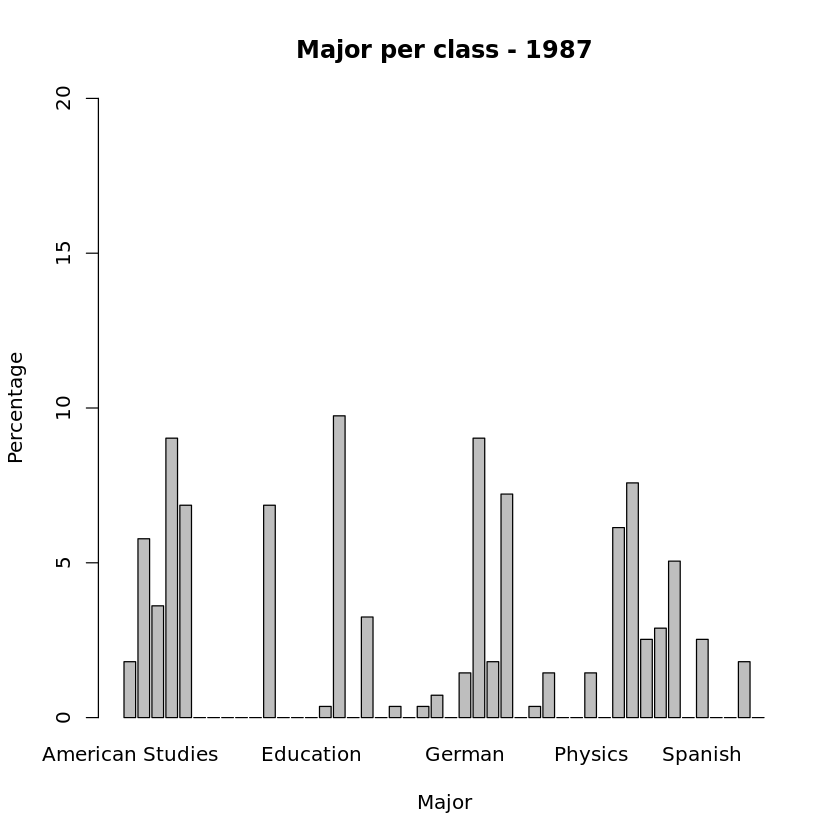

In [18]:
proportionsfourthclass <- table(fourthclass$Major)/length(fourthclass$Major)
percentagesfourthclass <- proportionsfourthclass*100
barplot(percentagesfourthclass, main="Major per class - 1987", xlab="Major",ylab="Percentage", ylim=c(0,20))

In [19]:
table(fifthclass$Major)


         American Studies              Anthropology                       Art 
                        9                        17                        12 
                  Biology                 Chemistry         Chemistry-Zoology 
                       35                        21                         0 
                  Chinese                  Classics    Comparative Literature 
                        2                         4                         0 
         Computer Science                 Economics        Economics-Business 
                        4                        29                         0 
 Economics-Regional Stds.                 Education               Engineering 
                        0                         0                         0 
                  English        English-Journalism                    French 
                       29                         0                         7 
          General Science   General Science-Biology

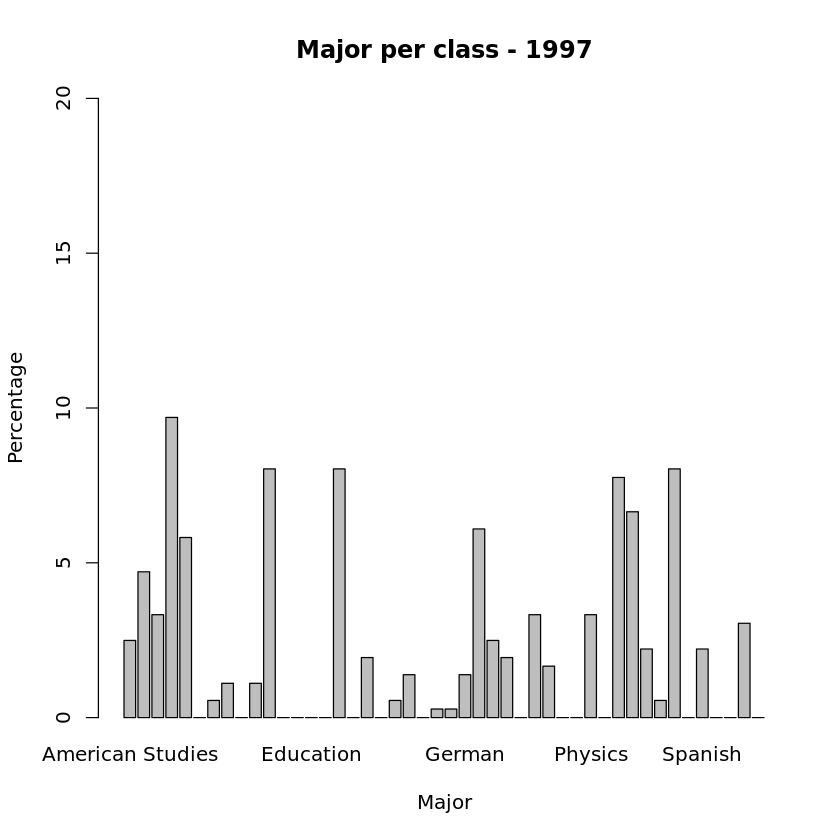

In [20]:
proportionsfifthclass <- table(fifthclass$Major)/length(fifthclass$Major)
percentagesfifthclass <- proportionsfifthclass*100
barplot(percentagesfifthclass, main="Major per class - 1997", xlab="Major",ylab="Percentage", ylim=c(0,20))

There is not much to see here. Indeed, most period had a different prominent major which means that depending on the economical and social context, people are more likely to choose a program compared to another.There is not much to see here. Indeed, most period had a different prominent major which means that depending on the economical and social context, people are more likely to choose a program compared to another.

Now we want to know if the gender has any influence regarding the will to contribute more to its old school :

In [21]:
#Group Analysis - Gender

table(firstclass$Gender)


 F  M 
46 81 

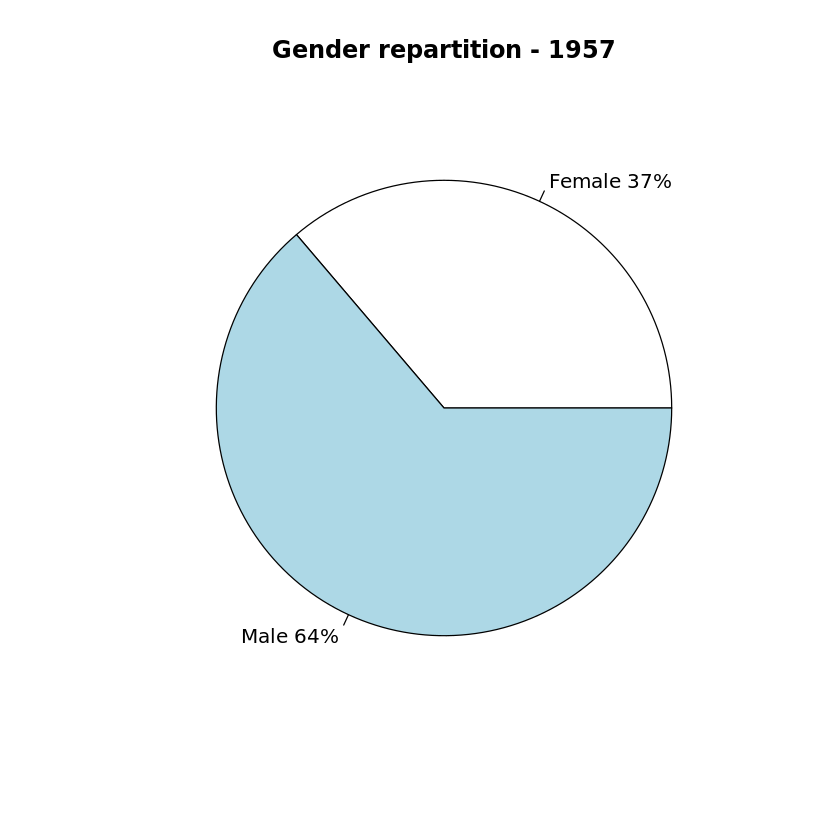

In [22]:
proportionsfirstclassgender <- table(firstclass$Gender)/length(firstclass$Gender)
percentagesfirstclassgender <- proportionsfirstclassgender*100
realpercentfirstclassgender <- ceiling(percentagesfirstclassgender)
labels <- c("Female","Male")
lbls <- paste(labels, realpercentfirstclassgender)
lbls <- paste(lbls,"%",sep="")
pie(percentagesfirstclassgender,label=lbls, main="Gender repartition - 1957")

In [23]:
table(secondclass$Gender)


  F   M 
103 119 

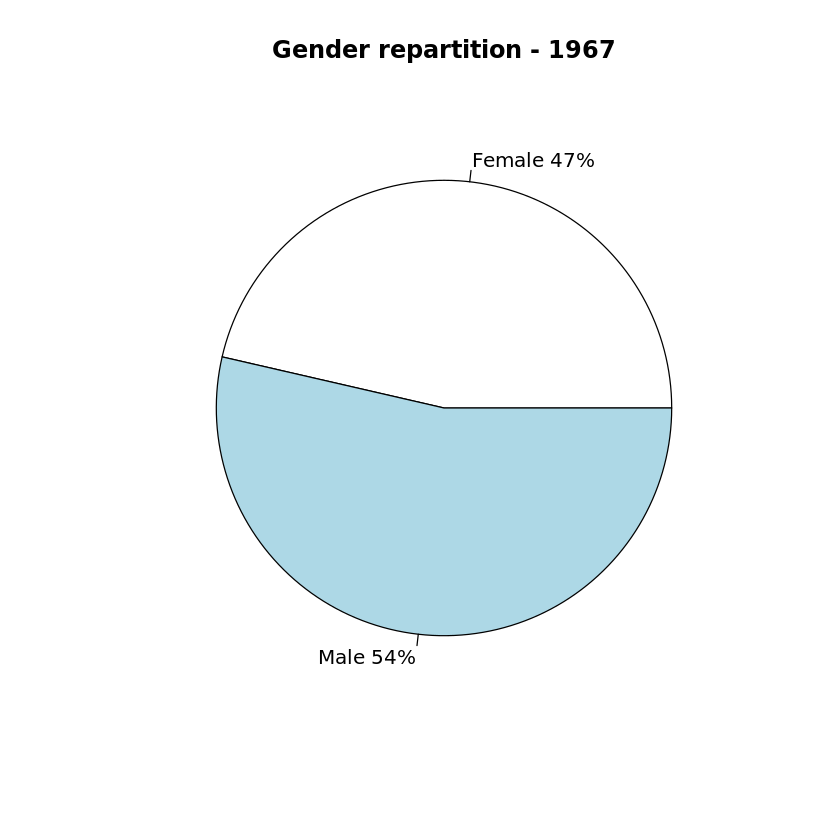

In [24]:
proportionssecondclassgender <- table(secondclass$Gender)/length(secondclass$Gender)
percentagessecondclassgender <- proportionssecondclassgender*100
realpercentsecondclassgender <- ceiling(percentagessecondclassgender)
labels <- c("Female","Male")
lbls <- paste(labels, realpercentsecondclassgender)
lbls <- paste(lbls,"%",sep="")
pie(percentagessecondclassgender,label=lbls, main="Gender repartition - 1967")

In [25]:
table(thirdclass$Gender)


  F   M 
119 124 

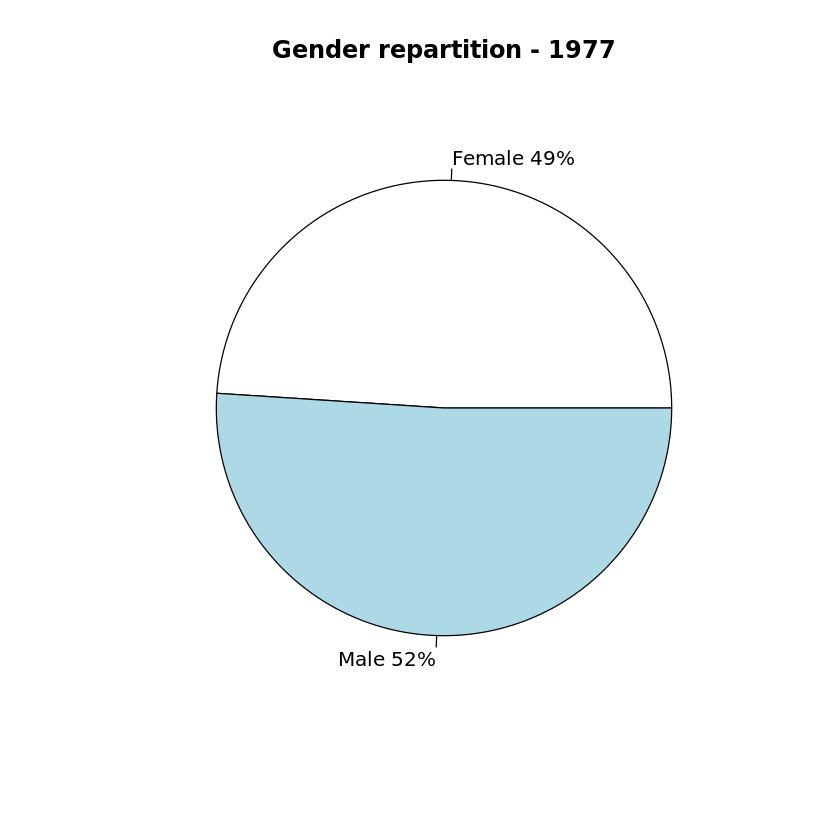

In [26]:
proportionsthirdclassgender <- table(thirdclass$Gender)/length(thirdclass$Gender)
percentagesthirdclassgender <- proportionsthirdclassgender*100
realpercentthirdclassgender <- ceiling(percentagesthirdclassgender)
labels <- c("Female","Male")
lbls <- paste(labels, realpercentthirdclassgender)
lbls <- paste(lbls,"%",sep="")
pie(percentagesthirdclassgender,label=lbls, main="Gender repartition - 1977")

In [27]:
table(fourthclass$Gender)


  F   M 
157 120 

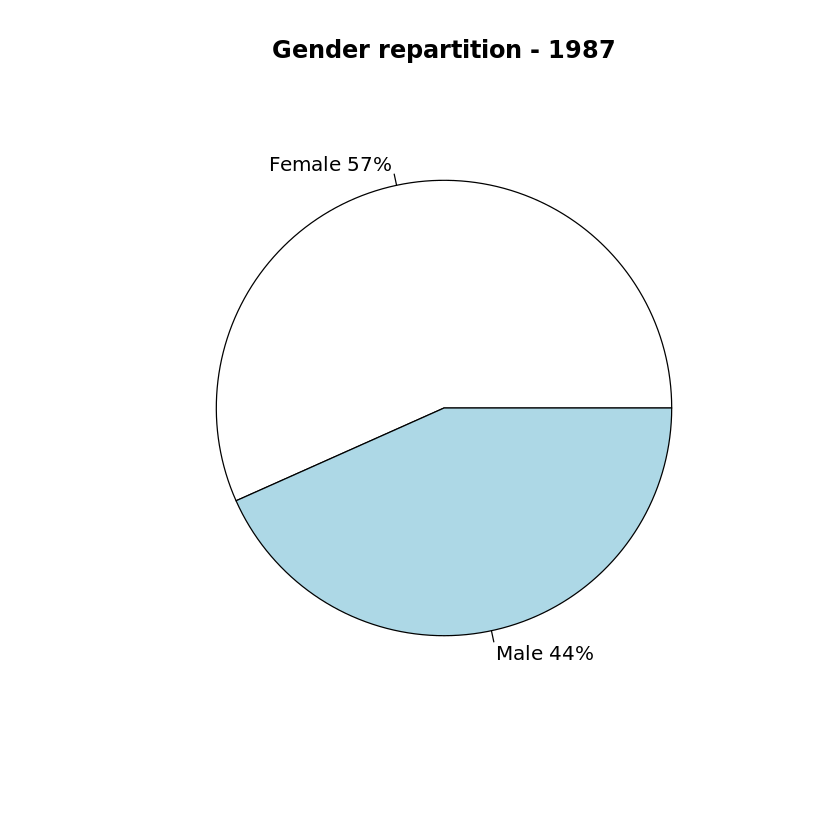

In [28]:
proportionsfourthclassgender <- table(fourthclass$Gender)/length(fourthclass$Gender)
percentagesfourthclassgender <- proportionsfourthclassgender*100
realpercentfourthclassgender <- ceiling(percentagesfourthclassgender)
labels <- c("Female","Male")
lbls <- paste(labels, realpercentfourthclassgender)
lbls <- paste(lbls,"%",sep="")
pie(percentagesfourthclassgender,label=lbls, main="Gender repartition - 1987")

In [29]:
table(fifthclass$Gender)


  F   M 
190 171 

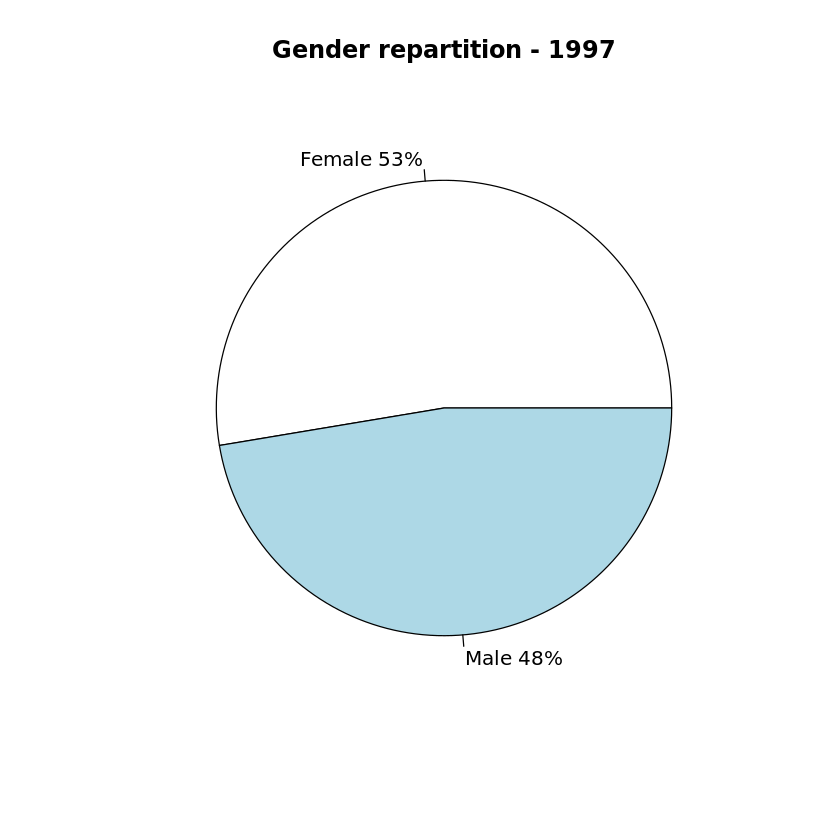

In [30]:
proportionsfifthclassgender <- table(fifthclass$Gender)/length(fifthclass$Gender)
percentagesfifthclassgender <- proportionsfifthclassgender*100
realpercentfifthclassgender <- ceiling(percentagesfifthclassgender)
labels <- c("Female","Male")
lbls <- paste(labels, realpercentfifthclassgender)
lbls <- paste(lbls,"%",sep="")
pie(percentagesfifthclassgender,label=lbls, main="Gender repartition - 1997")

When it comes to gender, we can assume that the only pattern explaining the increase in female number of student, (with the timeline) is an easier access to higher education for women.

We want to solve another question which has been highlighted at the start of our workbook, what did the students do after their major as other education ?

In [31]:
#What did they do after Major?
次 <- table(MyData$Major,MyData$Next.Degree)

In [32]:
summary(次)

Number of cases in table: 1230 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 3501, df = 2205, p-value = 1.845e-62
	Chi-squared approximation may be incorrect

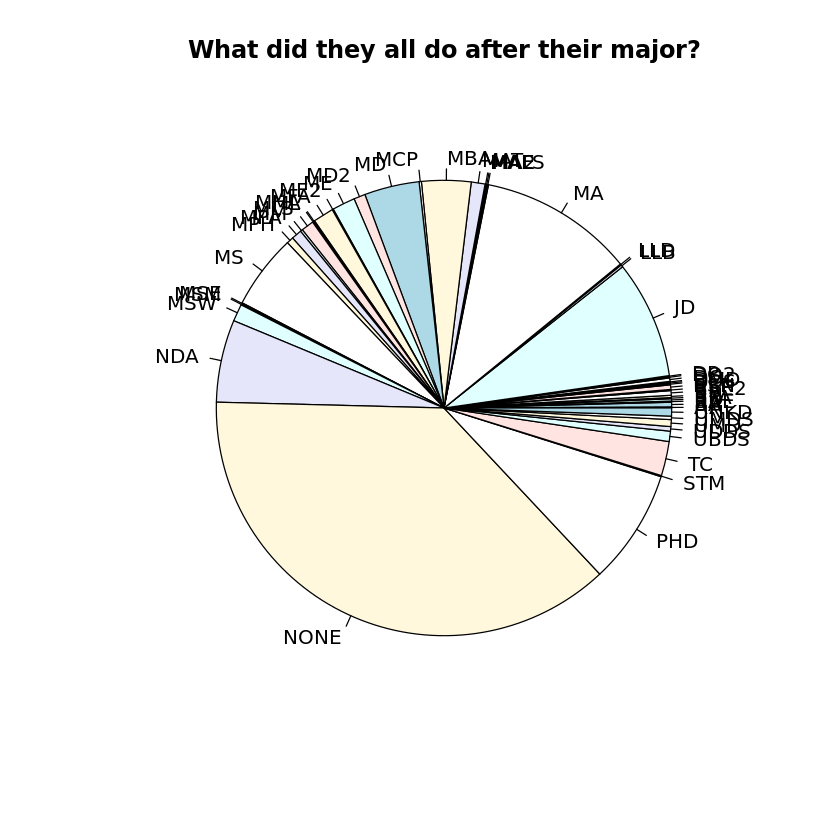

In [33]:
proportionsnext <- table(MyData$Next.Degree)/length(MyData$Next.Degree)
pie(proportionsnext,main="What did they all do after their major?")

We can see that the majority of students did not follow any studies post major.

So, we now want to know who are the people who are not giving us any money ? To do that we need to see if there are any specific pattern in the data which may explain a link between the lack of donation and the school.

First we group everysingle people who did not donate into one dataset, and then we take a look at all the variables :

In [34]:
#Who are the people who did not give us money?
Vancleefguys <- MyData[ which(MyData$FY04Giving=="0"&MyData$FY03Giving=="0"&MyData$FY02Giving=="0"&MyData$FY01Giving=="0"&MyData$FY00Giving=="0"),]

In [35]:
str(Vancleefguys)

'data.frame':	422 obs. of  11 variables:
 $ Gender         : Factor w/ 2 levels "F","M": 1 1 2 1 1 2 1 2 2 1 ...
 $ Class.Year     : int  1957 1957 1957 1957 1957 1957 1957 1957 1957 1957 ...
 $ Marital.Status : Factor w/ 4 levels "D","M","S","W": 2 3 2 2 2 2 2 1 2 4 ...
 $ Major          : Factor w/ 46 levels "American Studies",..: 28 26 16 28 37 12 9 28 12 16 ...
 $ Next.Degree    : Factor w/ 50 levels "AA","BA","BAE",..: 42 19 42 45 42 42 42 43 42 42 ...
 $ FY04Giving     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ FY03Giving     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ FY02Giving     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ FY01Giving     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ FY00Giving     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ AttendenceEvent: int  0 0 1 1 1 0 1 0 0 0 ...


Attendence might be an interesting analysis. We will look at people at the number of people who attended any events and those who did not :

In [36]:
table(Vancleefguys$AttendenceEvent)


  0   1 
238 184 

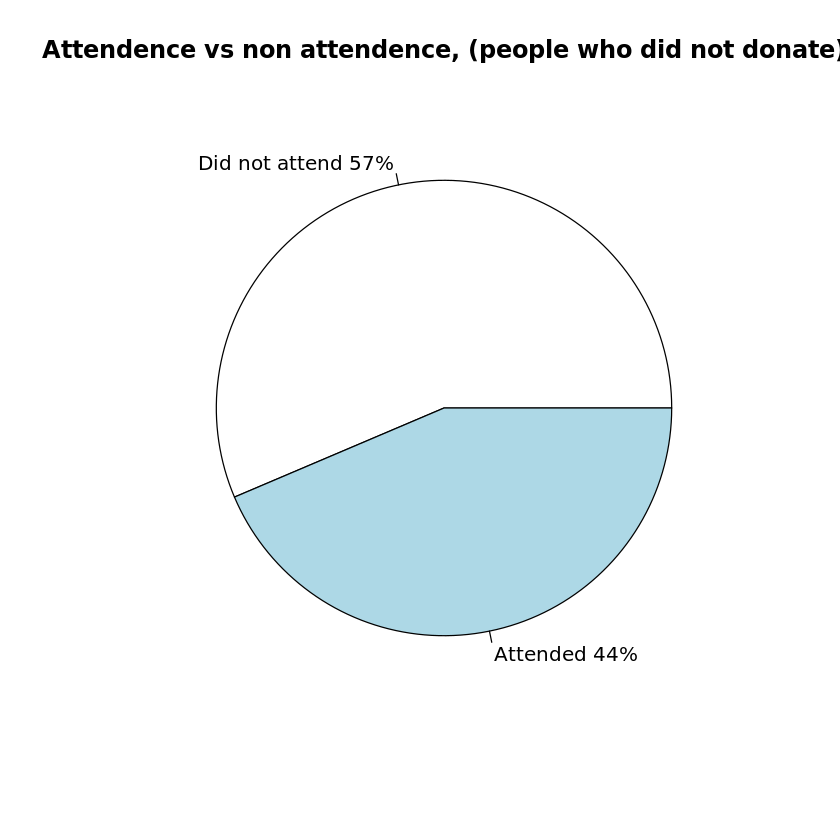

In [37]:
proportionsVancleef <- table(Vancleefguys$AttendenceEvent)/length(Vancleefguys$AttendenceEvent)
percentagesVancleef <- proportionsVancleef*100
realpercentVancleef <- ceiling(percentagesVancleef)
labels <- c("Did not attend","Attended")
lbls <- paste(labels, realpercentVancleef)
lbls <- paste(lbls,"%",sep="")
pie(percentagesVancleef, label=lbls,main="Attendence vs non attendence, (people who did not donate)")

It appears that most people who did not donate, are not attending any events. However the proportion is not that much for this kind of analysis, there are many people who attended and did not donate. Therefore, we need to look at other criteria which might put a persona on people who are not donating.

Consequently, we are now doing a gender analysis on this dataset :

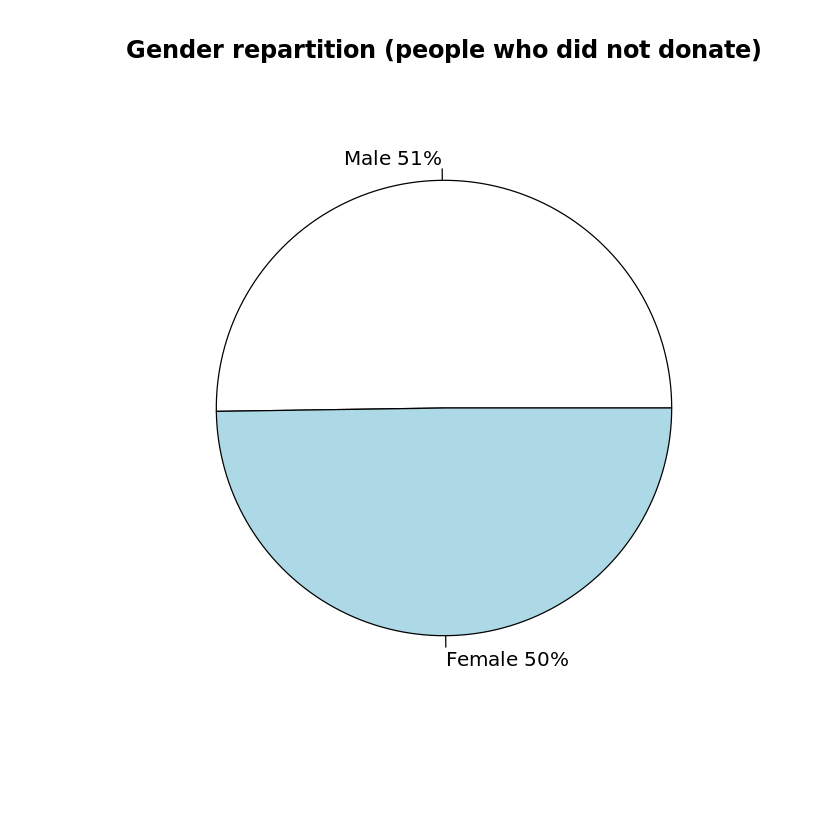

In [38]:
proportionsgenderVancleef <- table(Vancleefguys$Gender)/length(Vancleefguys$Gender)
percentagesgenderVancleef <- proportionsgenderVancleef*100
realpercentgenderVancleef <- ceiling(percentagesgenderVancleef)
labels <- c("Male","Female")
lbls <- paste(labels, realpercentgenderVancleef)
lbls <- paste(lbls,"%",sep="")
pie(percentagesgenderVancleef, label=lbls,main="Gender repartition (people who did not donate)")

No pattern to be found here. We are doing a last analysis using Years :

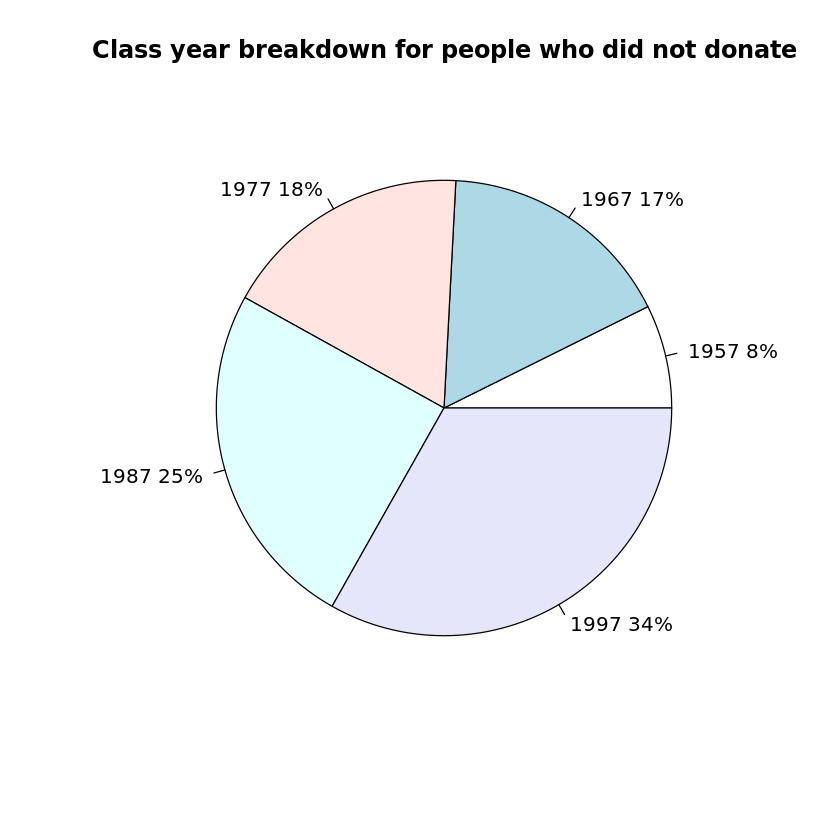

In [39]:
proportionsclassVancleef <- table(Vancleefguys$Class.Year)/length(Vancleefguys$Class.Year)
percentagesclassVancleef <- proportionsclassVancleef*100
realpercentclassVancleef <- ceiling(percentagesclassVancleef)
labels <- c("1957","1967","1977","1987","1997")
lbls <- paste(labels, realpercentclassVancleef)
lbls <- paste(lbls,"%",sep="")
pie(percentagesclassVancleef, label=lbls,main="Class year breakdown for people who did not donate")

Most people who are not donating are the latest students, which makes sense. However, the 1967 year has a very high score which follow the fact that they did not donate that much and were close in term of donation to the 1977 year. We can assume that the 1967 year was a year which was not efficient for the school.

By analyzing the data thoroughfully, we found the following answers to our questions :

※ The people who gave the largest amount of money are people who were alumni for the longest time, it can be explain by the fact that they had more opportunities to donate, more professional evolution and thus had a longest timeline. Though, we saw that by considering the period of time people are Alumni vs donation, we saw that the 1967 people are less interesting than their 1977 counterpart. One reason might be insatisfaction to the school in 1967.

※ People who did not give any money are the people who graduated last in the large majority. However we can see that 1967 are less likely to donate than 1977 guys if we put them on the same timeframe. We also saw that people who did not donate are attending events which mean two things : ・They like to leech on other people ・They are still interested by the school and do not have the opportunity to donate for X reasons.

※ Most people are not following any studies after their major.

To summarize :

Our dataset does not have an unpredictable behaviour with exception of the year 1967 which is going against the other trends in the data. The other analyses can help to solve this specifity but cannot answer why the data is not following the logical pattern for this date.

Data : ESCP Europe